# Enron Sentiment Analysis: 90s Partition

In [1]:
import pandas as pd

# Importing data
main = pd.read_csv('../../data/processed_emails.csv',index_col=False)
main.replace(to_replace='NaN', value=None, inplace=True)
main.drop(['message', 'file'], axis = 1, inplace=True)

# Turning date strings int datetime objects
main['date'] = pd.to_datetime(main['date'])

main.head()

/var/folders/xc/qgn4x7m553q861_qsrx3p1gr0000gn/T/ipykernel_96038/2735748863.py:9: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  main['date'] = pd.to_datetime(main['date'])


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
0,Here is our forecast,phillip.allen@enron.com,tim.belden@enron.com,NaN,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-14 16:39:00-07:00
1,Traveling to have a business meeting takes the...,phillip.allen@enron.com,john.lavorato@enron.com,NaN,NaN,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-04 13:51:00-07:00
2,test successful. way to go!!!,phillip.allen@enron.com,leah.arsdall@enron.com,NaN,NaN,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-18 03:00:00-07:00
3,"Randy, Can you send me a schedule of the salar...",phillip.allen@enron.com,randall.gay@enron.com,NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-23 06:13:00-07:00
4,Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,greg.piper@enron.com,NaN,NaN,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-31 05:07:00-07:00


In [2]:
data_90s = main[main['date'] < pd.to_datetime('2000-01-01 00:00:00-07:00')]
data_90s.head()

,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
275,---------------------- Forwarded by Phillip K ...,phillip.allen@enron.com,pallen70@hotmail.com,NaN,NaN,Stick it in your Shockmachine!,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,1999-12-11 06:39:00-08:00
276,"Naomi,The two analysts that I have had contact...",phillip.allen@enron.com,naomi.johnston@enron.com,NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,1999-12-10 07:00:00-08:00
664,How is your racing going? What category are y...,phillip.allen@enron.com,muller@thedoghousemail.com,NaN,NaN,Re: (No Subject),\Phillip_Allen_Dec2000\Notes Folders\All docum...,1979-12-31 16:00:00-08:00
698,EOL report for TV in conference on 33Cash -Heh...,phillip.allen@enron.com,"stephen.harrington@enron.com, mary@enron.com",NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\All docum...,1979-12-31 16:00:00-08:00
715,"Jeff, I want to bid $2.8 for sagewood with a r...",phillip.allen@enron.com,jsmith@austintx.com,NaN,NaN,Re: MISSION SOUTH,\Phillip_Allen_Dec2000\Notes Folders\All docum...,1979-12-31 16:00:00-08:00


### Network Analysis

In [3]:
#For 1999
data_99 = data_90s[data_90s['date'] >= pd.to_datetime('1999-01-01 00:00:00-7:00')]
grouped_df = data_90s.groupby(['sender', 'recipient1']).size().reset_index(name='count')

grouped_df.head()



,sender,recipient1,count
0,accthelp@cooltravelassistant.com,mark.taylor@enron.com,2
1,af@tfts.tozzini.com.br,sara.shackleton@enron.com,2
2,af@tozzini.com.br,sara.shackleton@enron.com,2
3,aimee.lannou@enron.com,daren.farmer@enron.com,3
4,alan.aronowitz@enron.com,dan.hyvl@enron.com,1


In [4]:
executives = ["jeff.skilling@enron.com", "kenneth.lay@enron.com", "andrew.fastow@enron.com","rebecca.mark@enron.com","arthur.andersen@enron.com","lou.pai@enron.com"]


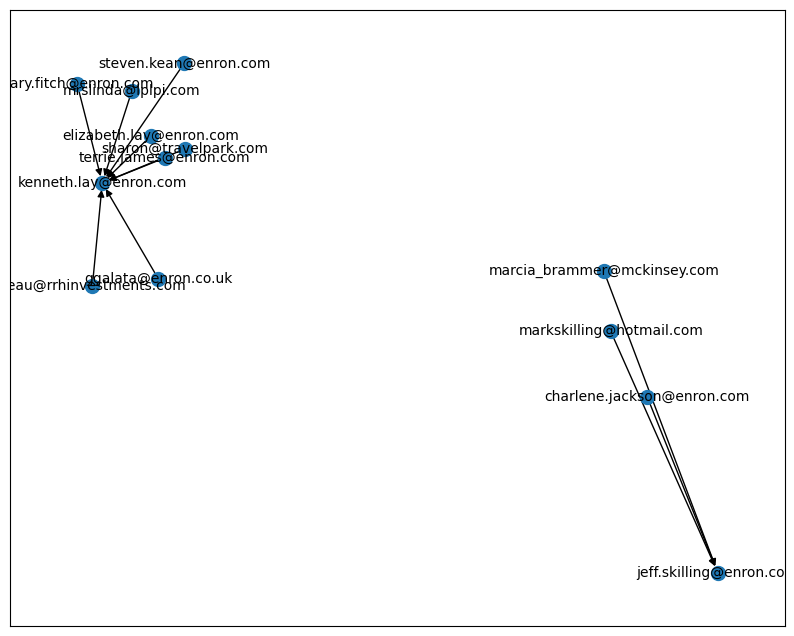

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()

potential_participants = []
for index, row in grouped_df.iterrows():
    if row['sender'] in executives or row['recipient1'] in executives:
        if row['sender'] in executives:
            potential_participants.append(row['recipient1'])
        else:
            potential_participants.append(row['sender'])
        G.add_edge(row['sender'], row['recipient1'], weight=row['count'])
plt.figure(figsize=(10, 8))
nx.draw_networkx(G, with_labels=True,node_size=100, font_size=10)
plt.show()


In [6]:
print(potential_participants)
sus_df = data_90s[data_90s['sender'].isin(potential_participants) | data_90s['recipient1'].isin(potential_participants)]
sus_df

['beau@rrhinvestments.com', 'charlene.jackson@enron.com', 'elizabeth.lay@enron.com', 'gary.fitch@enron.com', 'ggalata@enron.co.uk', 'marcia_brammer@mckinsey.com', 'markskilling@hotmail.com', 'mrslinda@lplpi.com', 'sharon@travelpark.com', 'steven.kean@enron.com', 'terrie.james@enron.com']


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
64619,X-Folder: \Jeff_Dasovich_Dec2000\Notes Folders...,steven.kean@enron.com,"paul.kaufman@enron.com, susan.mara@enron.com, ...",Bcc: richard.shapiro@enron.com,X-From: Steven J Kean,"\tmona.petrochko@enron.com, sandra.mccubbin@en...","X-To: Paul Kaufman, Susan J Mara, Jeff Dasovic...",1999-10-06 06:44:00-07:00
83583,X-Folder: \Jeff_Dasovich_Dec2000\Notes Folders...,steven.kean@enron.com,"paul.kaufman@enron.com, susan.mara@enron.com, ...",Bcc: richard.shapiro@enron.com,X-From: Steven J Kean,"\tmona.petrochko@enron.com, sandra.mccubbin@en...","X-To: Paul Kaufman, Susan J Mara, Jeff Dasovic...",1999-10-06 06:44:00-07:00
183112,"X-Origin: JONES-TX-FileName: tjones.nsfSteve, ...",tana.jones@enron.com,steven.kean@enron.com,X-From: Tana Jones,X-To: Steven J Kean,Re: EnronOnline Market Descriptions,X-cc: Jeffrey T Hodge,1999-09-03 09:03:00-07:00
196871,"X-Origin: JONES-TX-FileName: tjones.nsfSteve, ...",tana.jones@enron.com,steven.kean@enron.com,X-From: Tana Jones,X-To: Steven J Kean,Re: EnronOnline Market Descriptions,X-cc: Jeffrey T Hodge,1999-09-03 09:03:00-07:00
227429,Per Geoff Roberts,steven.kean@enron.com,Subject: PGE/Commercial Support Group Meeting...,X-bcc:,X-Folder: \Steven_Kean_Dec2000_1\Notes Folders...,Mime-Version: 1.0,X-Origin: KEAN-S,1997-03-03 03:00:00-08:00
...,...,...,...,...,...,...,...,...
446195,"Mark, I have a letter here that Jeff would lik...",sherri.reinartz@enron.com,markskilling@hotmail.com,NaN,NaN,Re:,\Jeffrey_Skilling_Dec2000\Notes Folders\Sent,1999-02-16 06:39:00-08:00
446244,"Happy to hear you are ok, Mark. Do you need a...",sherri.reinartz@enron.com,markskilling@hotmail.com,NaN,NaN,Re: earthquake---are you all right?,\Jeffrey_Skilling_Dec2000\Notes Folders\Sent,1999-08-16 17:18:00-07:00
446255,"Mark,I got your nice letter - hope things are ...",sherri.reinartz@enron.com,markskilling@hotmail.com,NaN,NaN,NaN,\Jeffrey_Skilling_Dec2000\Notes Folders\Sent,1999-09-17 03:45:00-07:00
475813,"X-To: Steven J KeanX-cc: Mark E Haedicke, Mark...",jeffrey.keeler@enron.com,steven.kean@enron.com,Content-Transfer-Encoding: 7bit,"Bcc: mark.haedicke@enron.com, mark.taylor@enro...",Final Version - Talking Points for Ken Lay - L...,"\tcynthia.sandherr@enron.com, joe.hillings@enr...",1999-07-23 09:19:00-07:00


In [7]:
sus_df['text'][445889]

"X-Origin: SKILLING-JX-FileName: jskillin.nsfI'm in one piece; oblivious (if not for the news) of the bombs going offall around me.  There's close to 15 million people here, so it shouldtake a while for them to get to me if they go at 13 people increments.Inappropriate joking aside, what an awful thing.  I wonder at thestrange sort of logic that compels the bastards.  I hope they met asgrisly an end as the ones their handing out.Did you get my picture?  Looking forward to the basket of goodies.  Ihave a mailbox now, so letters should be more secure.Thanks for the note.  Hope all is well.Mark-O>From: TOMSKILLJR@aol.com>To: markskilling@hotmail.com>Subject: explosion attack>Date: Sat, 13 Mar 1999 23:37:56 EST>>Dear Mark ;   We saw a bad explosion on WGN-Tv in Istanbul just a fewminutes>ago.  Please assure your safety.  I mailed a large envelope of goodiesto you>last Wednesday.  Love from both of us.  Mother and Dad.Get Your Private, Free Email at http://www.hotmail.com"

In [8]:
import sentiment_funcs as sf

# Parititioning data into groups of 1000
chunks_90s = sf.chunk_dataframe(sus_df, chunk_size=100)

data_90s = sf.label_df(chunks_90s)
data_90s

/opt/anaconda3/envs/enron/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



Processing Chunk 1/9



/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embeddings'] = embeddings_list
/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = results



Processing Chunk 2/9



/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embeddings'] = embeddings_list
/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = results



Processing Chunk 3/9



/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embeddings'] = embeddings_list
/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = results



Processing Chunk 4/9



/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embeddings'] = embeddings_list
/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = results



Processing Chunk 5/9



/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embeddings'] = embeddings_list
/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = results



Processing Chunk 6/9



/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embeddings'] = embeddings_list
/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = results



Processing Chunk 7/9



/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embeddings'] = embeddings_list
/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = results



Processing Chunk 8/9



/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embeddings'] = embeddings_list
/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = results



Processing Chunk 9/9



/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embeddings'] = embeddings_list
/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = results


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,embeddings,label
0,X-Folder: \Jeff_Dasovich_Dec2000\Notes Folders...,steven.kean@enron.com,"paul.kaufman@enron.com, susan.mara@enron.com, ...",Bcc: richard.shapiro@enron.com,X-From: Steven J Kean,"\tmona.petrochko@enron.com, sandra.mccubbin@en...","X-To: Paul Kaufman, Susan J Mara, Jeff Dasovic...",1999-10-06 06:44:00-07:00,"[-0.053374093025922775, -0.0565754771232605, 0...",neutral
1,X-Folder: \Jeff_Dasovich_Dec2000\Notes Folders...,steven.kean@enron.com,"paul.kaufman@enron.com, susan.mara@enron.com, ...",Bcc: richard.shapiro@enron.com,X-From: Steven J Kean,"\tmona.petrochko@enron.com, sandra.mccubbin@en...","X-To: Paul Kaufman, Susan J Mara, Jeff Dasovic...",1999-10-06 06:44:00-07:00,"[-0.04948565363883972, -0.055881042033433914, ...",neutral
2,"X-Origin: JONES-TX-FileName: tjones.nsfSteve, ...",tana.jones@enron.com,steven.kean@enron.com,X-From: Tana Jones,X-To: Steven J Kean,Re: EnronOnline Market Descriptions,X-cc: Jeffrey T Hodge,1999-09-03 09:03:00-07:00,"[-0.08461281657218933, 0.08048088848590851, -0...",neutral
3,"X-Origin: JONES-TX-FileName: tjones.nsfSteve, ...",tana.jones@enron.com,steven.kean@enron.com,X-From: Tana Jones,X-To: Steven J Kean,Re: EnronOnline Market Descriptions,X-cc: Jeffrey T Hodge,1999-09-03 09:03:00-07:00,"[-0.08461281657218933, 0.08048088848590851, -0...",neutral
4,Per Geoff Roberts,steven.kean@enron.com,Subject: PGE/Commercial Support Group Meeting...,X-bcc:,X-Folder: \Steven_Kean_Dec2000_1\Notes Folders...,Mime-Version: 1.0,X-Origin: KEAN-S,1997-03-03 03:00:00-08:00,"[0.048576436936855316, 0.031071152538061142, -...",neutral
...,...,...,...,...,...,...,...,...,...,...
859,"Mark, I have a letter here that Jeff would lik...",sherri.reinartz@enron.com,markskilling@hotmail.com,NaN,NaN,Re:,\Jeffrey_Skilling_Dec2000\Notes Folders\Sent,1999-02-16 06:39:00-08:00,"[-0.013745233416557312, -0.03020964004099369, ...",neutral
860,"Happy to hear you are ok, Mark. Do you need a...",sherri.reinartz@enron.com,markskilling@hotmail.com,NaN,NaN,Re: earthquake---are you all right?,\Jeffrey_Skilling_Dec2000\Notes Folders\Sent,1999-08-16 17:18:00-07:00,"[-0.04569626599550247, -0.02535329759120941, 0...",positive
861,"Mark,I got your nice letter - hope things are ...",sherri.reinartz@enron.com,markskilling@hotmail.com,NaN,NaN,NaN,\Jeffrey_Skilling_Dec2000\Notes Folders\Sent,1999-09-17 03:45:00-07:00,"[-0.023875096812844276, -0.0843149945139885, 0...",positive
862,"X-To: Steven J KeanX-cc: Mark E Haedicke, Mark...",jeffrey.keeler@enron.com,steven.kean@enron.com,Content-Transfer-Encoding: 7bit,"Bcc: mark.haedicke@enron.com, mark.taylor@enro...",Final Version - Talking Points for Ken Lay - L...,"\tcynthia.sandherr@enron.com, joe.hillings@enr...",1999-07-23 09:19:00-07:00,"[-0.11330448091030121, -0.04899350926280022, 0...",neutral


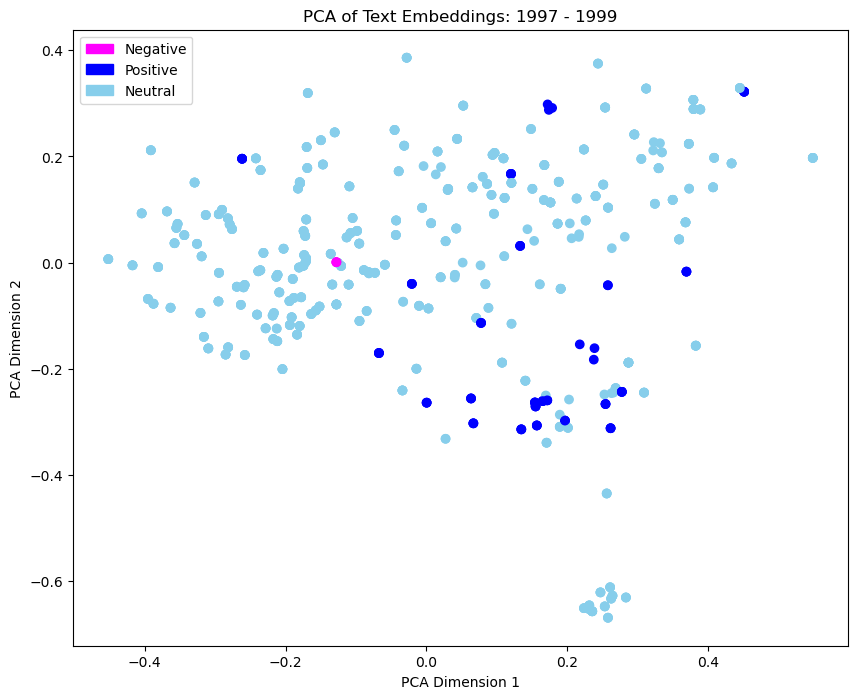

In [33]:

# import numpy as np
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

# # Reduce dimensionality using PCA
# pca = PCA(n_components=2)
# embeddings_2d = pca.fit_transform(data_90s['embeddings'].tolist())


# labels = data_90s['label'].tolist()
# colors = ['magenta' if label == 'negative' else 'blue' if label == 'positive' else '#87CEEB' for label in labels]

# #Create Scatter Plot
# plt.figure(figsize=(10, 8))
# plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)


# negative_patch = mpatches.Patch(color='magenta', label='Negative')
# positive_patch = mpatches.Patch(color='blue', label='Positive')
# neutral_patch = mpatches.Patch(color='#87CEEB', label='Neutral')

# plt.legend(handles=[negative_patch, positive_patch, neutral_patch])
# plt.xlabel('PCA Dimension 1')
# plt.ylabel('PCA Dimension 2')
# plt.title('2D PCA Embedding of Sentiment Analysis')
# plt.show()



import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



def PCA_plot(data: pd.DataFrame, title: str):
    # Reduce dimensionality using PCA
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(data['embeddings'].tolist())


    labels = data['label'].tolist()
    colors = ['magenta' if label == 'negative' else 'blue' if label == 'positive' else '#87CEEB' for label in labels]

    #Create Scatter Plot
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)


    negative_patch = mpatches.Patch(color='magenta', label='Negative')
    positive_patch = mpatches.Patch(color='blue', label='Positive')
    neutral_patch = mpatches.Patch(color='#87CEEB', label='Neutral')

    plt.legend(handles=[negative_patch, positive_patch, neutral_patch])
    plt.xlabel('PCA Dimension 1')
    plt.ylabel('PCA Dimension 2')
    plt.title(f'PCA of Text Embeddings: {title}')
    plt.show()


PCA_plot(data_90s, '1997 - 1999')

In [ ]:
plt.savefig('../../figures/sentiment_p1.png')

<Figure size 640x480 with 0 Axes>

### Printing  Messages

In [15]:
negative_msgs = data_90s[data_90s['label'] == 'negative']
neutral_msgs = data_90s[data_90s['label'] == 'neutral']
positive_msgs = data_90s[data_90s['label'] == 'positive']

def print_emails (df):
    for _, row in df.iterrows():
        print(f"\n{_}: {row['text']}\n")

In [16]:
# Negative Emails
print_emails(negative_msgs)


684: X-Origin: LAY-KX-FileName: klay.nsfI just got off the phone with Daniel at the Ritz  and I am a little upset because it turns out the entire hotel is booked up until the 26th (Friday) before the wedding. We are going to have a number of people who will want to come in at least Thursday or Wednesday before the wedding and others who will want to come in an entire week before and will not want to switch hotels. Therefore, I'm not sure it is going to work. Further, they are requiring the three night stay beginning on Friday and we have a number of Argentines who will want to leave on Sunday but will be charged for Sunday night. Sooo, we are back at square one and trying to find another place for everything. I don't want to cancel the Ritz just yet, but if we can book rooms for the week before the wedding and the weekend of the wedding at the Four Season and if you can suggest a really great place to have the reception, that may be what we have to do.  Can you please advise me on you

In [17]:
#Neutral Emails
print_emails(neutral_msgs)

# 3, 


0: X-Folder: \Jeff_Dasovich_Dec2000\Notes Folders\All documentsX-Origin: DASOVICH-JX-FileName: jdasovic.nsfHeads up.  This is not to be discussed in advance out side of Enron, but you guys need to know.  If there are ways we can be helpful, call Carolyn Green to discuss.---------------------- Forwarded by Steven J Kean/HOU/EES on 10/06/99 01:39 PM ---------------------------Mark Palmer@ENRON10/06/99 11:18 AMTo: Steven J Kean/HOU/EES@EEScc:  Subject: Madera Ranch Press ReleaseThis will touch off a firestorm.  Diane is doing a good job, retaining McNally Temple in CA and even getting some message development help from our old friends at Public Strategies in Austin.  I'll stay on top of it.---------------------- Forwarded by Mark Palmer/Corp/Enron on 10/06/99 11:03 AM ---------------------------Diane Bazelides@AZURIX10/05/99 04:23 PMTo: Rebecca P Mark/HOU/AZURIX@AZURIX, John Ale/HOU/AZURIX@AZURIX, Neil D Meyer/HOU/AZURIX@AZURIX, Rodney Faldyn/HOU/AZURIX@AZURIX, Rodney L Gray/HOU/AZURIX@A

In [18]:
#Positive Emails
print_emails(positive_msgs)


72: Lunch - still outstanding (No mci guy)2:30-  Chris Perkins, Senator Jefferds office (R-VT), Senate Building Room 728 Hart, Malcolm and Cynthia will attend, she also invited Mike Marvin, Business Council3:30 - Rick Kessler, Congressman Pallone, Democrate from New Jersey, 420 Cannon, Malcolm can also attend4:00 - Elise Jones, Congresswoman Furse (D-OR), 316 Cannon, Malcolm can go to this MCI we'll try to do on May 1st.


85: Looks good.  Some of his questions suggest he's going to include a fair amount of industry reaction -- which could be a mixed bag, some are clearly threatened by efficiencies in bw markets.  Looks like it will be a really good story.  He definitely appears to be excited by it.


102: Mike - perhaps you can help me or forward this on to someone who can.  The people in my organization support all the Enron business units but many are specifically dedicated to certain business units.  As a consequence, we have ended up on a variety of LANs with a variety of support

In [13]:
data_90s


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,embeddings,label
0,X-Folder: \Jeff_Dasovich_Dec2000\Notes Folders...,steven.kean@enron.com,"paul.kaufman@enron.com, susan.mara@enron.com, ...",Bcc: richard.shapiro@enron.com,X-From: Steven J Kean,"\tmona.petrochko@enron.com, sandra.mccubbin@en...","X-To: Paul Kaufman, Susan J Mara, Jeff Dasovic...",1999-10-06 06:44:00-07:00,"[-0.053374093025922775, -0.0565754771232605, 0...",neutral
1,X-Folder: \Jeff_Dasovich_Dec2000\Notes Folders...,steven.kean@enron.com,"paul.kaufman@enron.com, susan.mara@enron.com, ...",Bcc: richard.shapiro@enron.com,X-From: Steven J Kean,"\tmona.petrochko@enron.com, sandra.mccubbin@en...","X-To: Paul Kaufman, Susan J Mara, Jeff Dasovic...",1999-10-06 06:44:00-07:00,"[-0.04948565363883972, -0.055881042033433914, ...",neutral
2,"X-Origin: JONES-TX-FileName: tjones.nsfSteve, ...",tana.jones@enron.com,steven.kean@enron.com,X-From: Tana Jones,X-To: Steven J Kean,Re: EnronOnline Market Descriptions,X-cc: Jeffrey T Hodge,1999-09-03 09:03:00-07:00,"[-0.08461281657218933, 0.08048088848590851, -0...",neutral
3,"X-Origin: JONES-TX-FileName: tjones.nsfSteve, ...",tana.jones@enron.com,steven.kean@enron.com,X-From: Tana Jones,X-To: Steven J Kean,Re: EnronOnline Market Descriptions,X-cc: Jeffrey T Hodge,1999-09-03 09:03:00-07:00,"[-0.08461281657218933, 0.08048088848590851, -0...",neutral
4,Per Geoff Roberts,steven.kean@enron.com,Subject: PGE/Commercial Support Group Meeting...,X-bcc:,X-Folder: \Steven_Kean_Dec2000_1\Notes Folders...,Mime-Version: 1.0,X-Origin: KEAN-S,1997-03-03 03:00:00-08:00,"[0.048576436936855316, 0.031071152538061142, -...",neutral
...,...,...,...,...,...,...,...,...,...,...
859,"Mark, I have a letter here that Jeff would lik...",sherri.reinartz@enron.com,markskilling@hotmail.com,NaN,NaN,Re:,\Jeffrey_Skilling_Dec2000\Notes Folders\Sent,1999-02-16 06:39:00-08:00,"[-0.013745233416557312, -0.03020964004099369, ...",neutral
860,"Happy to hear you are ok, Mark. Do you need a...",sherri.reinartz@enron.com,markskilling@hotmail.com,NaN,NaN,Re: earthquake---are you all right?,\Jeffrey_Skilling_Dec2000\Notes Folders\Sent,1999-08-16 17:18:00-07:00,"[-0.04569626599550247, -0.02535329759120941, 0...",positive
861,"Mark,I got your nice letter - hope things are ...",sherri.reinartz@enron.com,markskilling@hotmail.com,NaN,NaN,NaN,\Jeffrey_Skilling_Dec2000\Notes Folders\Sent,1999-09-17 03:45:00-07:00,"[-0.023875096812844276, -0.0843149945139885, 0...",positive
862,"X-To: Steven J KeanX-cc: Mark E Haedicke, Mark...",jeffrey.keeler@enron.com,steven.kean@enron.com,Content-Transfer-Encoding: 7bit,"Bcc: mark.haedicke@enron.com, mark.taylor@enro...",Final Version - Talking Points for Ken Lay - L...,"\tcynthia.sandherr@enron.com, joe.hillings@enr...",1999-07-23 09:19:00-07:00,"[-0.11330448091030121, -0.04899350926280022, 0...",neutral


# Enron Analysis 2002 Partition

In [26]:
data_02 = main[(main['date'] < pd.to_datetime('2003-01-01 00:00:00-07:00')) & 
                (main['date'] >= pd.to_datetime('2002-01-01 00:00:00-07:00'))]
data_02.head()


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
2013,"Dear phillip,This e-mail is automated notifica...",subscriptions@intelligencepress.com,pallen@enron.com,NaN,NaN,"NGI Publications - Tuesday, January 1st 2002","\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox",2002-01-01 14:34:36-08:00
2014,"Dear phillip,This e-mail is automated notifica...",subscriptions@intelligencepress.com,pallen@enron.com,NaN,NaN,"NGI Publications - Wednesday, January 2nd 2002","\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox",2002-01-01 14:46:05-08:00
2015,This request has been pending your approval fo...,arsystem@mailman.enron.com,k..allen@enron.com,NaN,NaN,Your Approval is Overdue: Access Request for m...,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\Inbox",2002-01-01 17:19:40-08:00
6111,X-Origin: Arnold-JX-FileName: jarnold (Non-Pri...,msagel@home.com,jarnold@enron.com,"X-From: ""Mark Sagel"" <msagel@home.com>@ENRON",X-To: John Arnold <jarnold@enron.com>,Market update,X-cc: Mike Maggi <mmaggi@enron.com>,2002-01-01 11:04:18-08:00
8264,This request has been pending your approval fo...,arsystem@mailman.enron.com,harry.arora@enron.com,NaN,NaN,Your Approval is Overdue: Access Request for j...,"\Harry_Arora_Jan2002\Arora, Harry\Inbox",2002-01-01 01:11:25-08:00


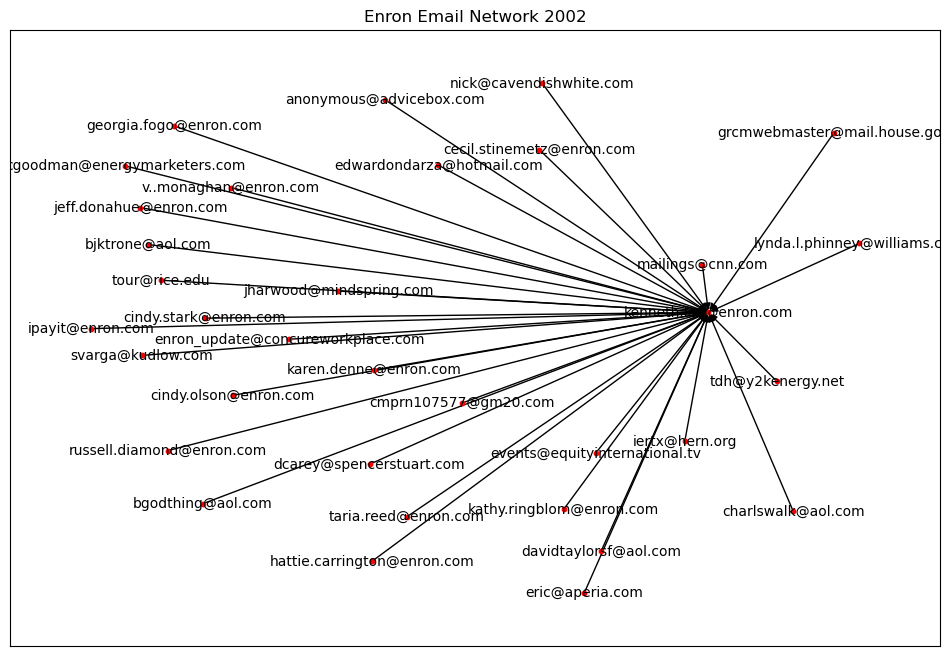

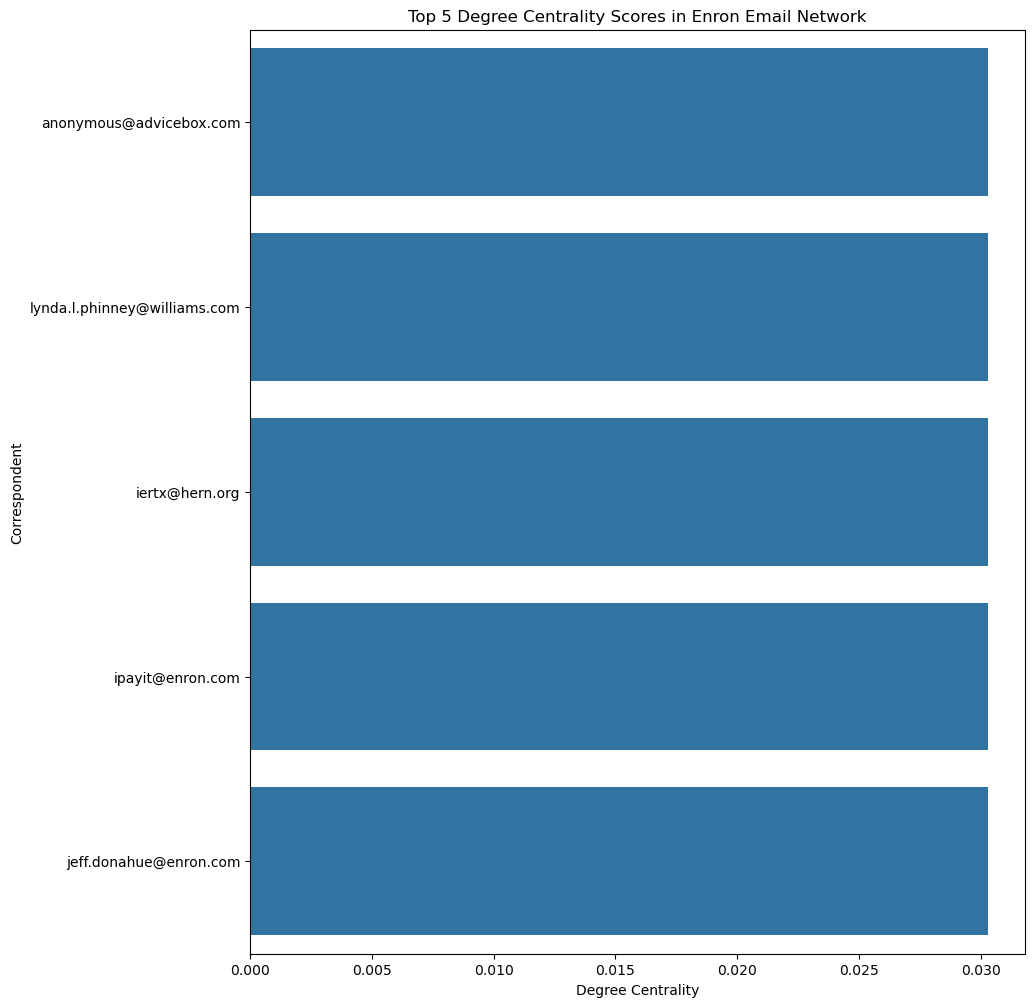



Executives: ['jeff.skilling@enron.com', 'kenneth.lay@enron.com', 'andrew.fastow@enron.com', 'rebecca.mark@enron.com', 'arthur.andersen@enron.com', 'lou.pai@enron.com']

Top 5 Most-Involved in Emails: ['anonymous@advicebox.com', 'lynda.l.phinney@williams.com', 'iertx@hern.org', 'ipayit@enron.com', 'jeff.donahue@enron.com']


[['jeff.skilling@enron.com',
  'kenneth.lay@enron.com',
  'andrew.fastow@enron.com',
  'rebecca.mark@enron.com',
  'arthur.andersen@enron.com',
  'lou.pai@enron.com',
  'anonymous@advicebox.com',
  'lynda.l.phinney@williams.com',
  'iertx@hern.org',
  'ipayit@enron.com',
  'jeff.donahue@enron.com']]

In [28]:
import network_funcs as nf
executives = nf.get_executives()


import network_funcs as nf

executives = nf.get_executives()
suspicious_individuals = []
G = nf.create_network(data_02, "Enron Email Network 2002", True)
cent_df = nf.degree_centrality(G)
cent_list = cent_df['name'].to_list()
sus_folks = executives + cent_list[:5]
print(f"\n\nExecutives: {executives}\n\nTop 5 Most-Involved in Emails: {cent_list[:5]}")
suspicious_individuals.append(sus_folks)

suspicious_individuals

In [30]:
sus_df = data_02[(data_02['sender'].isin(suspicious_individuals[0])) | (data_02['recipient1'].isin(suspicious_individuals[0]))]
sus_df.drop_duplicates(inplace=True)
sus_df


/var/folders/xc/qgn4x7m553q861_qsrx3p1gr0000gn/T/ipykernel_96038/3849419490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sus_df.drop_duplicates(inplace=True)


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
39102,Alert! You are receiving this message because...,ipayit@enron.com,rick.buy@enron.com,NaN,NaN,Action Requested: Past Due Invoice for User: ...,\rbuy\Inbox,2002-01-22 00:07:31-08:00
49269,Alert!You are receiving this message because y...,ipayit@enron.com,michelle.cash@enron.com,NaN,NaN,Action Requested: Past Due Invoice for User: ...,"\Michelle_Cash_Jan2002\Cash, Michelle\Inbox",2002-01-01 22:07:19-08:00
52088,X-FileName: scorman (Non-Privileged).pstPlease...,ipayit@enron.com,shelley.corman@enron.com,"X-To: Corman, Shelley </O=ENRON/OU=NA/CN=RECIP...",X-cc:,Action Requested: Invoice Requires Coding/Issue,X-bcc:,2002-01-15 15:05:13-08:00
52093,Alert! You are receiving this message because...,ipayit@enron.com,shelley.corman@enron.com,NaN,NaN,Action Requested: Past Due Invoice for User: ...,"\Shelley_Corman_Mar2002\Corman, Shelley\Delete...",2002-01-16 00:07:16-08:00
52591,Alert! You are receiving this message because...,ipayit@enron.com,shelley.corman@enron.com,NaN,NaN,Action Requested: Past Due Invoice for User: ...,"\Shelley_Corman_Mar2002\Corman, Shelley\Inbox\...",2002-01-21 00:07:32-08:00
...,...,...,...,...,...,...,...,...
460415,X-FileName: fletcher sturm 6-26-02.PSTPlease d...,ipayit@enron.com,j..sturm@enron.com,"X-To: Sturm, Fletcher J. </O=ENRON/OU=NA/CN=RE...",X-cc:,Action Requested: Invoice Requires Coding/Issue,X-bcc:,2002-01-10 08:05:48-08:00
460581,Please let me know if you continue to get this...,ipayit@enron.com,j..sturm@enron.com,NaN,NaN,RE: Action Requested: Past Due Invoice for Us...,"\ExMerge - Sturm, Fletcher J.\Deleted Items",2002-01-24 09:27:56-08:00
461037,please send this to Tamara Jae Black for appro...,j..sturm@enron.com,ipayit@enron.com,NaN,NaN,RE: Action Requested: Past Due Invoice for Us...,"\ExMerge - Sturm, Fletcher J.\Sent Items",2002-01-24 06:37:46-08:00
489666,Alert!You are receiving this message because y...,ipayit@enron.com,judy.townsend@enron.com,NaN,NaN,Action Requested: Past Due Invoice for User: ...,"\ExMerge - Townsend, Judy\Deleted Items",2002-01-14 22:06:17-08:00


In [31]:
import sentiment_funcs as sf

# Parititioning data into groups of 1000
chunks_02 = sf.chunk_dataframe(sus_df, chunk_size=100)

In [32]:
#Sentiment classification
results_02 = sf.label_df(chunks_02)
results_02


Processing Chunk 1/1



/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embeddings'] = embeddings_list
/Users/austinaguilar/fall2024/inta6450/enron_analysis/notebooks/aguilar_analysis/sentiment_funcs.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = results


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,embeddings,label
0,Alert! You are receiving this message because...,ipayit@enron.com,rick.buy@enron.com,NaN,NaN,Action Requested: Past Due Invoice for User: ...,\rbuy\Inbox,2002-01-22 00:07:31-08:00,"[-0.08538703620433807, 0.049130164086818695, -...",neutral
1,Alert!You are receiving this message because y...,ipayit@enron.com,michelle.cash@enron.com,NaN,NaN,Action Requested: Past Due Invoice for User: ...,"\Michelle_Cash_Jan2002\Cash, Michelle\Inbox",2002-01-01 22:07:19-08:00,"[-0.08538703620433807, 0.049130164086818695, -...",neutral
2,X-FileName: scorman (Non-Privileged).pstPlease...,ipayit@enron.com,shelley.corman@enron.com,"X-To: Corman, Shelley </O=ENRON/OU=NA/CN=RECIP...",X-cc:,Action Requested: Invoice Requires Coding/Issue,X-bcc:,2002-01-15 15:05:13-08:00,"[-0.0907655879855156, 0.021788490936160088, -0...",neutral
3,Alert! You are receiving this message because...,ipayit@enron.com,shelley.corman@enron.com,NaN,NaN,Action Requested: Past Due Invoice for User: ...,"\Shelley_Corman_Mar2002\Corman, Shelley\Delete...",2002-01-16 00:07:16-08:00,"[-0.08538703620433807, 0.049130164086818695, -...",neutral
4,Alert! You are receiving this message because...,ipayit@enron.com,shelley.corman@enron.com,NaN,NaN,Action Requested: Past Due Invoice for User: ...,"\Shelley_Corman_Mar2002\Corman, Shelley\Inbox\...",2002-01-21 00:07:32-08:00,"[-0.08538703620433807, 0.049130164086818695, -...",neutral
...,...,...,...,...,...,...,...,...,...,...
89,X-FileName: fletcher sturm 6-26-02.PSTPlease d...,ipayit@enron.com,j..sturm@enron.com,"X-To: Sturm, Fletcher J. </O=ENRON/OU=NA/CN=RE...",X-cc:,Action Requested: Invoice Requires Coding/Issue,X-bcc:,2002-01-10 08:05:48-08:00,"[-0.09250807762145996, 0.0073921470902860165, ...",neutral
90,Please let me know if you continue to get this...,ipayit@enron.com,j..sturm@enron.com,NaN,NaN,RE: Action Requested: Past Due Invoice for Us...,"\ExMerge - Sturm, Fletcher J.\Deleted Items",2002-01-24 09:27:56-08:00,"[-0.08064991980791092, -0.007630352396517992, ...",neutral
91,please send this to Tamara Jae Black for appro...,j..sturm@enron.com,ipayit@enron.com,NaN,NaN,RE: Action Requested: Past Due Invoice for Us...,"\ExMerge - Sturm, Fletcher J.\Sent Items",2002-01-24 06:37:46-08:00,"[-0.1394733339548111, 0.0015221532667055726, 0...",neutral
92,Alert!You are receiving this message because y...,ipayit@enron.com,judy.townsend@enron.com,NaN,NaN,Action Requested: Past Due Invoice for User: ...,"\ExMerge - Townsend, Judy\Deleted Items",2002-01-14 22:06:17-08:00,"[-0.08538703620433807, 0.049130164086818695, -...",neutral


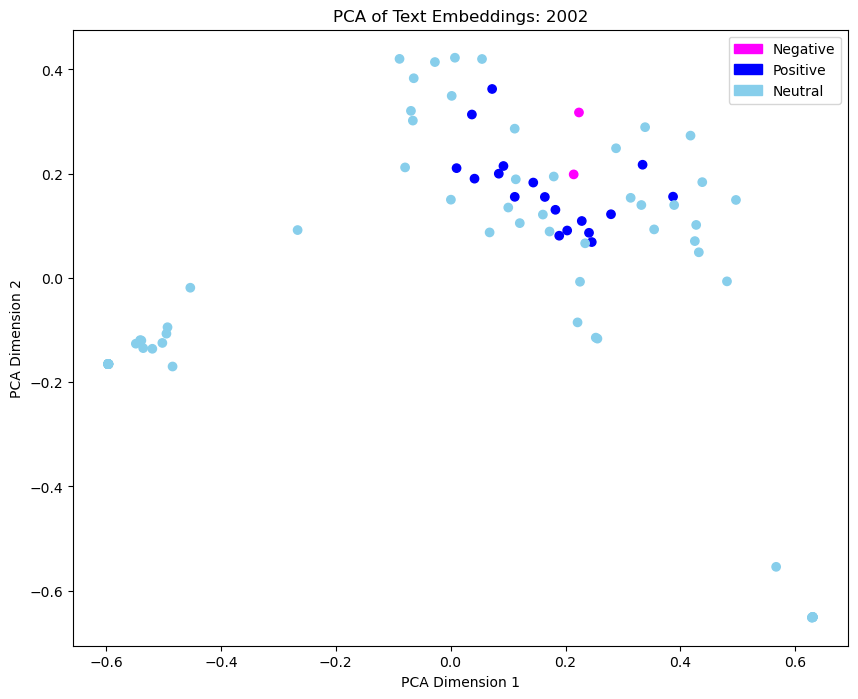

In [34]:

PCA_plot(results_02, '2002')

In [35]:
negative_msgs = results_02[results_02['label'] == 'negative']
neutral_msgs = results_02[results_02['label'] == 'neutral']
positive_msgs = results_02[results_02['label'] == 'positive']

In [36]:
print_emails(negative_msgs)

#19, 47


19: Mr. Lay: Why couldn't you have worked with us?  This is  the worst time of year and being in a recession has negatively impacted my  prospects for work. I've got a ton of experience and no one wants to  talk to me. I'm going to lose my home!!!!  You guys with  your millions and I'm going to be devastated.  What are you thinking  about?  I can't hardly sleep at night worrying about how I'm going to  provide for my family. Thanks, John W. Harwoodformerly EFS-CMS Atlanta1001 Bench Mark  DriveMcDonough, GA 30252jharwood@mindspring.com 678-583-4160  tel


47: Mr. LayWe are getting blasted in the news and a lot of the information is false. There is NO one there to tell the complete truth.  Americans are getting the news that the media wants them to hear and it is not the full truth. Don't we need a spokesman to counter the lies? In the end even if there were no wrong doing, it won't matter because the media (and politicians) have said the same lies over and over and finally Americans be

In [37]:
print_emails(neutral_msgs)


0: Alert!  You are receiving this message because you have an unresolved invoice in your iPayit in-box that is past due.  It is critical that you login to iPayit and take immediate action to resolve this invoice. Remember, you play an important role in ensuring that we pay our vendors on time. Tip!:  You must login to the system to forward this invoice to another user. To launch iPayit, click on the link below:http://iPayit.enron.comNote:  Your iPayit User ID and Password are your eHRonline/SAP Personnel ID and Password.First time iPayit user?  For training materials, click on the link below:http://isc.enron.com/site/doclibrary/user/default.aspNeed help?North America: ISC Call Center at (713) 345-4727.Europe: European Accounts Payable at +44-20-7783-7520.Asia-Pacific: Sydney Accounts Payable at +61-2-9229-2336


1: Alert!You are receiving this message because you have an unresolved invoice in your iPayit in-box that is past due.  It is critical that you login to iPayit and take immedi

In [38]:
print_emails(positive_msgs)

#26, 35


15: Dear Kenneth,Global security and disaster response are now more urgent than ever, requiring the participation of many countries, governments, agencies, companies, and organizations. You are therefore invited to participate in The Global Security & Disaster Response Summit, scheduled for March 24-26, at the Washington Convention Center in downtown Washington, DC.The Summit is the premier global forum in 2002 on global security and disaster response. Top U.S., multilateral, and allied officials will be speaking. General session highlights include "Protecting the Government & Critical Infrastructure"; "Relief & Reconstruction of Afghanistan"; and "South Asian & Middle Eastern Economic Development". Numerous workshops will be offered, provided by experts on a wide array of topics, including "What State & Local Emergency Management Agencies Need From the Corporate Sector"; "Security Needs & Resources for Businesses & NGO's with Foreign Operations"; and the programs and procurement proc